## A. Perform basic operations on TSA dataset.

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import numpy as np

In [2]:
# 1. Import the 'MSFT' Time Series data using yahoo finance.

ticker = yf.Ticker('MSFT')
historical_data = ticker.history(period='5y')

In [3]:
historical_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-11-22 00:00:00-05:00,143.539751,143.759738,142.344144,143.080627,15901800,0.00,0.0
2019-11-25 00:00:00-05:00,143.472804,144.764065,143.396283,144.649277,22420900,0.00,0.0
2019-11-26 00:00:00-05:00,144.773631,145.787503,144.735378,145.414474,24620100,0.00,0.0
2019-11-27 00:00:00-05:00,145.701439,145.864040,144.926688,145.691879,15184400,0.00,0.0
2019-11-29 00:00:00-05:00,145.481456,145.672751,144.697131,144.792786,11977300,0.00,0.0
...,...,...,...,...,...,...,...
2024-11-15 00:00:00-05:00,418.981369,421.955396,412.813721,414.170990,28247600,0.00,0.0
2024-11-18 00:00:00-05:00,414.041237,417.564184,411.276782,414.929474,24742000,0.00,0.0
2024-11-19 00:00:00-05:00,412.284740,417.105108,410.727858,416.955414,18133500,0.00,0.0


In [4]:
# 2. Calculate Simple Moving Average (SMA)

closing_sum = historical_data.Close.sum()
time_period = historical_data.shape[0]
sma = closing_sum/time_period
sma

283.13801871877405

In [5]:
# 3. Calculate Exponential Moving Average (EMA)

ema = historical_data.Close.ewm(span=10, adjust=False).mean()
ema

,Close
Date,
2019-11-22 00:00:00-05:00,143.080627
2019-11-25 00:00:00-05:00,143.365836
2019-11-26 00:00:00-05:00,143.738316
2019-11-27 00:00:00-05:00,144.093509
2019-11-29 00:00:00-05:00,144.220651
...,...
2024-11-15 00:00:00-05:00,419.921344
2024-11-18 00:00:00-05:00,419.013731
2024-11-19 00:00:00-05:00,418.639491


In [6]:
# 4. Calculate Weighted Moving Average (WMA)

weights = np.array([(historical_data.shape[0]-i) for i in range(1, historical_data.shape[0]+1)])
closing_prices = np.array(historical_data.Close)
wma = np.dot(weights, closing_prices)/weights.sum()
wma

240.69805931195918

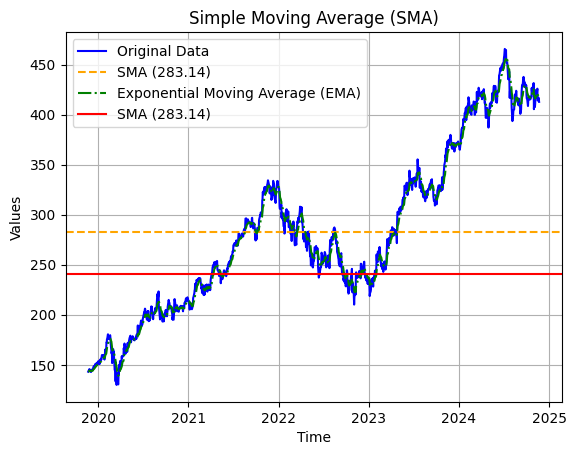

In [12]:
# 5. Plot the visualizations

plt.plot(historical_data.Close, label='Original Data', color='blue')

# SMA as a horizontal line
plt.axhline(y=sma, color='orange', linestyle='--', label=f'SMA ({sma:.2f})')

# EMA
plt.plot(ema, label='Exponential Moving Average (EMA)', color='green', linestyle='-.')

# WMA as a horizontal line
plt.axhline(y=wma, color='red', label=f'SMA ({sma:.2f})')

# Formatting the plot
plt.title('Simple Moving Average (SMA)')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.show()

In [13]:
# 6. Implement ARMA model on the dataset ‘airline_passengers.csv’.

df = pd.read_excel('airline_passengers.xlsx')
df.head()

,Month,Thousands of Passengers
0,1949-01-01 00:00:00,112.0
1,1949-02-01 00:00:00,118.0
2,1949-03-01 00:00:00,132.0
3,1949-04-01 00:00:00,129.0
4,1949-05-01 00:00:00,121.0


In [18]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [22]:
model = ARIMA(df['Thousands of Passengers'], order=(2, 1, 2))
model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


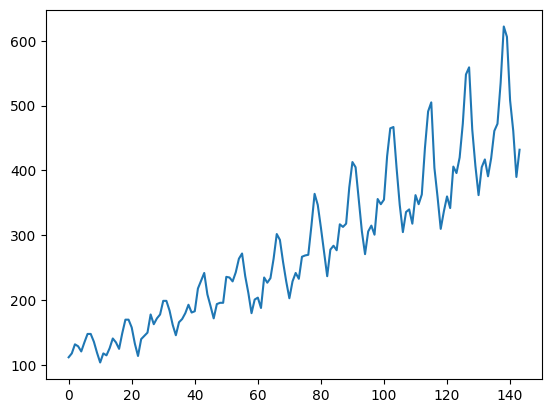

In [26]:
plt.plot( df.index, df['Thousands of Passengers'])
plt.show()

In [32]:
# 7. Plot the ACF and PACF graphs.

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

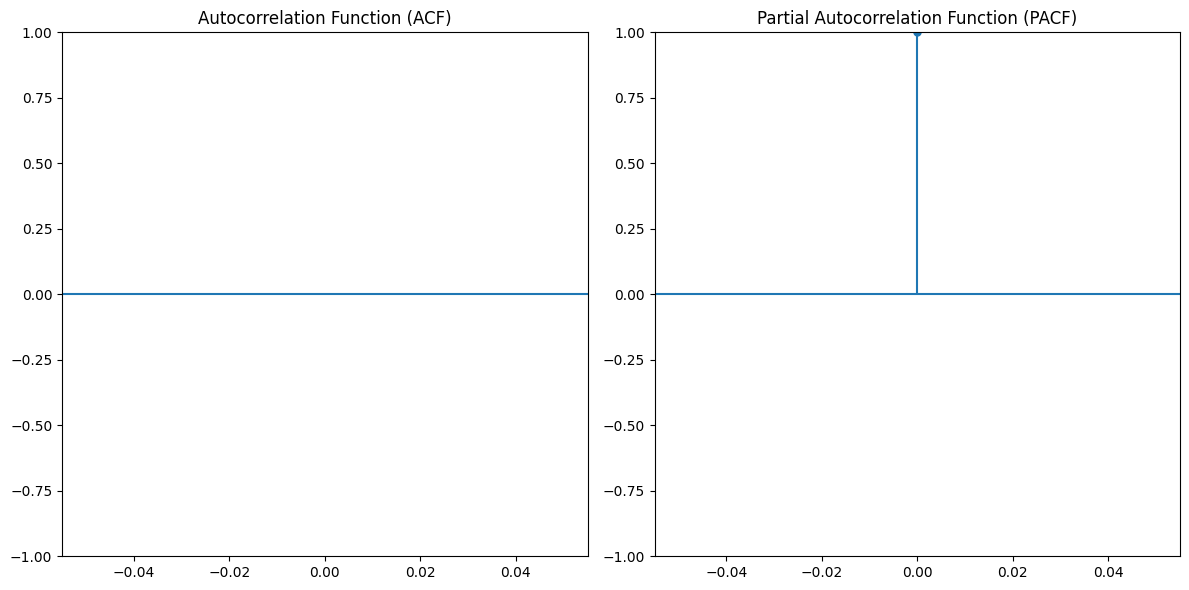

In [33]:
plt.figure(figsize=(12, 6))

# ACF Plot
plt.subplot(121)
plot_acf(df['Thousands of Passengers'], lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

# PACF Plot
plt.subplot(122)
plot_pacf(df['Thousands of Passengers'], lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')

# Show plots
plt.tight_layout()
plt.show()